In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train,_),(x_test,_)=fashion_mnist.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
print (x_train.shape)
print (x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


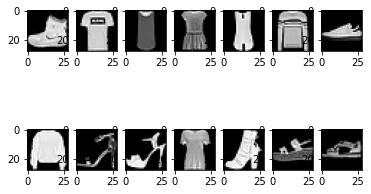

In [7]:
fig,ax=plt.subplots(2,7)
i=0
j=0
for el in x_train[0:14]:
    ax[j][i].imshow(el, cmap=plt.get_cmap('gray'))
    i+=1
    if(i==7):
        j+=1
        i=0

In [26]:
#autoencoders: extract features from a sample space, and then decode to reproduce the results
#here latent dimension is 64
latent_dim=64
input_im=tf.keras.Input(shape=(28,28,1))
encoder=tf.keras.Sequential([layers.Flatten(),layers.Dense(latent_dim,activation='relu')])
decoder=tf.keras.Sequential([layers.Dense(784,activation='sigmoid'),layers.Reshape((28,28))])
def autoenc(x_arr):
    feature=encoder(x_arr)
    output=decoder(feature)
    return output
model=Model(input_im,autoenc(input_im))
model.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [42]:
conv_encoder = tf.keras.Sequential([layers.Input(shape=(28, 28, 1)),layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

conv_decoder = tf.keras.Sequential([layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
    layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
    layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

def conv_autoenc(x):
    encoded = conv_encoder(x)
    decoded = conv_decoder(encoded)
    return decoded

conv_model=Model(input_im,conv_autoenc(input_im))
conv_model.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [43]:
#model.summary()
conv_model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential_25 (Sequential)   (None, 7, 7, 8)           1320      
_________________________________________________________________
sequential_26 (Sequential)   (None, 28, 28, 1)         1897      
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [45]:
conv_model.fit(x_train, x_train,epochs=10,shuffle=True,validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 3/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 8/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 9/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 10/10
1875/1875 [==============================] - 61s 33m

In [47]:
encoded_imgs = conv_encoder(x_test.reshape(10000,28,28,1)).numpy()
decoded_imgs = conv_decoder(encoded_imgs).numpy()

ValueError: Input 0 of layer sequential_25 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (10000, 28, 28)

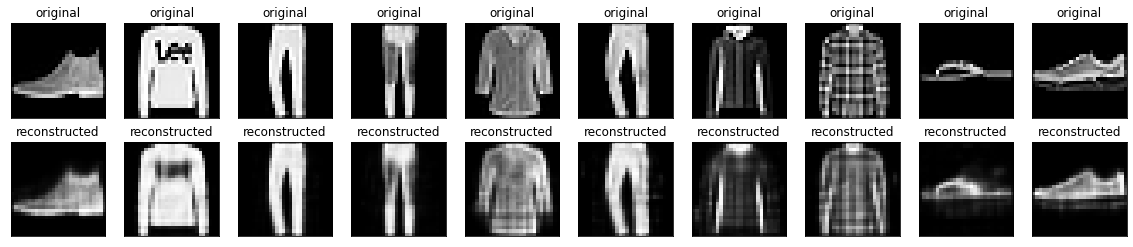

In [30]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

[[ 3.9764051   4.089792    0.         ...  0.641599    2.1588526
   1.1712778 ]
 [ 6.660129    1.0145983   2.87581    ...  0.46440262  0.13562739
   4.8461785 ]
 [ 1.7062452   3.1296568  10.196193   ...  2.3756406   5.8312073
   4.6269054 ]
 ...
 [ 1.962168    2.195469    3.8419623  ...  2.041346    3.3752894
   3.9139636 ]
 [ 2.4130619   2.290004    5.111173   ...  1.384963    0.29244828
   1.4990385 ]
 [ 1.6120334   2.434723    0.         ...  1.534055    2.13346
   2.05642   ]]


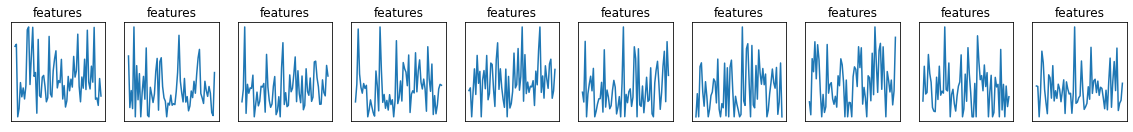

In [34]:
n = 10
plt.figure(figsize=(20, 4))
print(encoded_imgs)
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.plot(encoded_imgs[i])
  plt.title("features")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)